# Time Series Project
# *Time_series_forecasting_for_taxi_company*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Input data</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Chronological-order" data-toc-modified-id="Chronological-order-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Chronological order</a></span></li><li><span><a href="#Resampling" data-toc-modified-id="Resampling-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Resampling</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#New-features" data-toc-modified-id="New-features-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>New features</a></span></li></ul></li><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Splitting the data</a></span></li><li><span><a href="#Standard-scaling" data-toc-modified-id="Standard-scaling-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Standard scaling</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Model selection</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Base-model" data-toc-modified-id="Base-model-11.2.1"><span class="toc-item-num">11.2.1&nbsp;&nbsp;</span>Base model</a></span></li><li><span><a href="#Hyperparameters-tuning" data-toc-modified-id="Hyperparameters-tuning-11.2.2"><span class="toc-item-num">11.2.2&nbsp;&nbsp;</span>Hyperparameters tuning</a></span></li></ul></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>XGBoost</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-tuning" data-toc-modified-id="Hyperparameters-tuning-11.3.1"><span class="toc-item-num">11.3.1&nbsp;&nbsp;</span>Hyperparameters tuning</a></span></li></ul></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>LightGBM</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-tuning" data-toc-modified-id="Hyperparameters-tuning-11.4.1"><span class="toc-item-num">11.4.1&nbsp;&nbsp;</span>Hyperparameters tuning</a></span></li></ul></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>CatBoost</a></span><ul class="toc-item"><li><span><a href="#Hyperparameters-tuning" data-toc-modified-id="Hyperparameters-tuning-11.5.1"><span class="toc-item-num">11.5.1&nbsp;&nbsp;</span>Hyperparameters tuning</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-11.6"><span class="toc-item-num">11.6&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-11.7"><span class="toc-item-num">11.7&nbsp;&nbsp;</span>Feature importances</a></span></li></ul></li><li><span><a href="#Test-the-model" data-toc-modified-id="Test-the-model-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Test the model</a></span></li><li><span><a href="#Sanity-check" data-toc-modified-id="Sanity-check-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Sanity check</a></span></li></ul></div>

## Goal

Develop a model for the Sweet Lift Taxi company that predicts the amount of taxi orders for the next hour based on the historical data. It will be used to attract more drivers during peak hours.

The RMSE metric on the test set should not be more than 48.

## Data description

**Features**

- *datetime* — time stamp of the observation.

**Target**

- *num_orders* - the number of taxi orders at a particular time stamp.

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None, 'display.max_columns', None)

print("Setup Complete")

Setup Complete


## Input data

In [2]:
try:
    df = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/Time Series/taxi.csv', index_col=[0], parse_dates=[0])
    
except:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

## Descriptive statistics

In [8]:
df.head().reset_index()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [11]:
df.tail().reset_index()

,datetime,num_orders
0,2018-08-31 23:10:00,32
1,2018-08-31 23:20:00,24
2,2018-08-31 23:30:00,27
3,2018-08-31 23:40:00,39
4,2018-08-31 23:50:00,53


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Conclusion:
- There are more than 26k observations with 1 feature and 1 target variable;
- Data is collected for 6 months in 2018;
- Check if the dates and times are in chronological order;
- Resample data by 1 hour because we need to predict orders for the next hour. Take the sum as an aggregation function since we need to identify the total number of orders for a particular hour;
- No missing values;
- Need to check for duplicates;
- The target is numeric, it's a regression task.

## Data preprocessing
### Duplicates

In [12]:
df.index.duplicated().sum()

0

### Chronological order

In [13]:
df.sort_index(inplace=True)

In [14]:
df.index.is_monotonic

True

The dates and times are in chronological order.

### Resampling

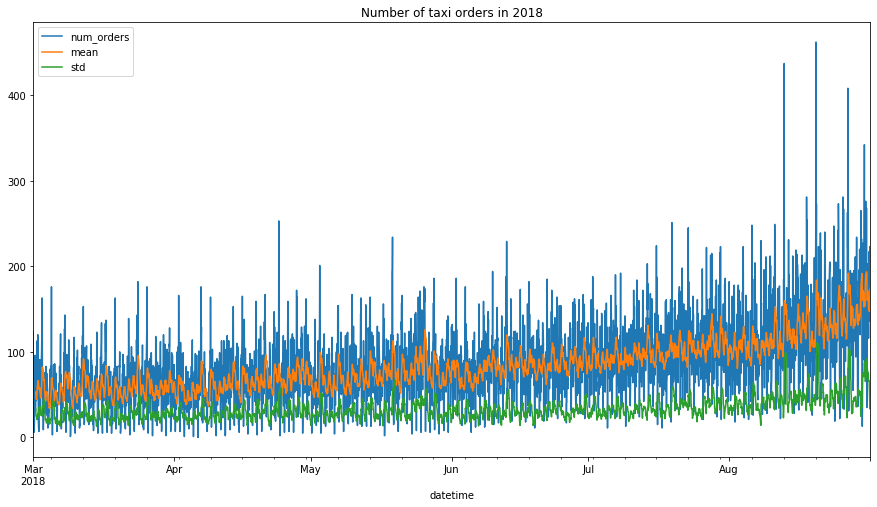

In [15]:
df = df.resample('1H').sum()
df['mean'] = df['num_orders'].rolling(15).mean()
df['std'] = df['num_orders'].rolling(15).std()
df.plot(figsize=(15,8), title='Number of taxi orders in 2018');

We see that the standard deviation almost doesn't change over time. However the average value of this dataset increases by a factor of 2. This stochastic process is slightly nonstationary.

In [16]:
df = df.drop(['mean','std'], axis=1)

## EDA
Let's perform a seasonal decomposition of this dataset to see if there are any trends and seasonality in the data.

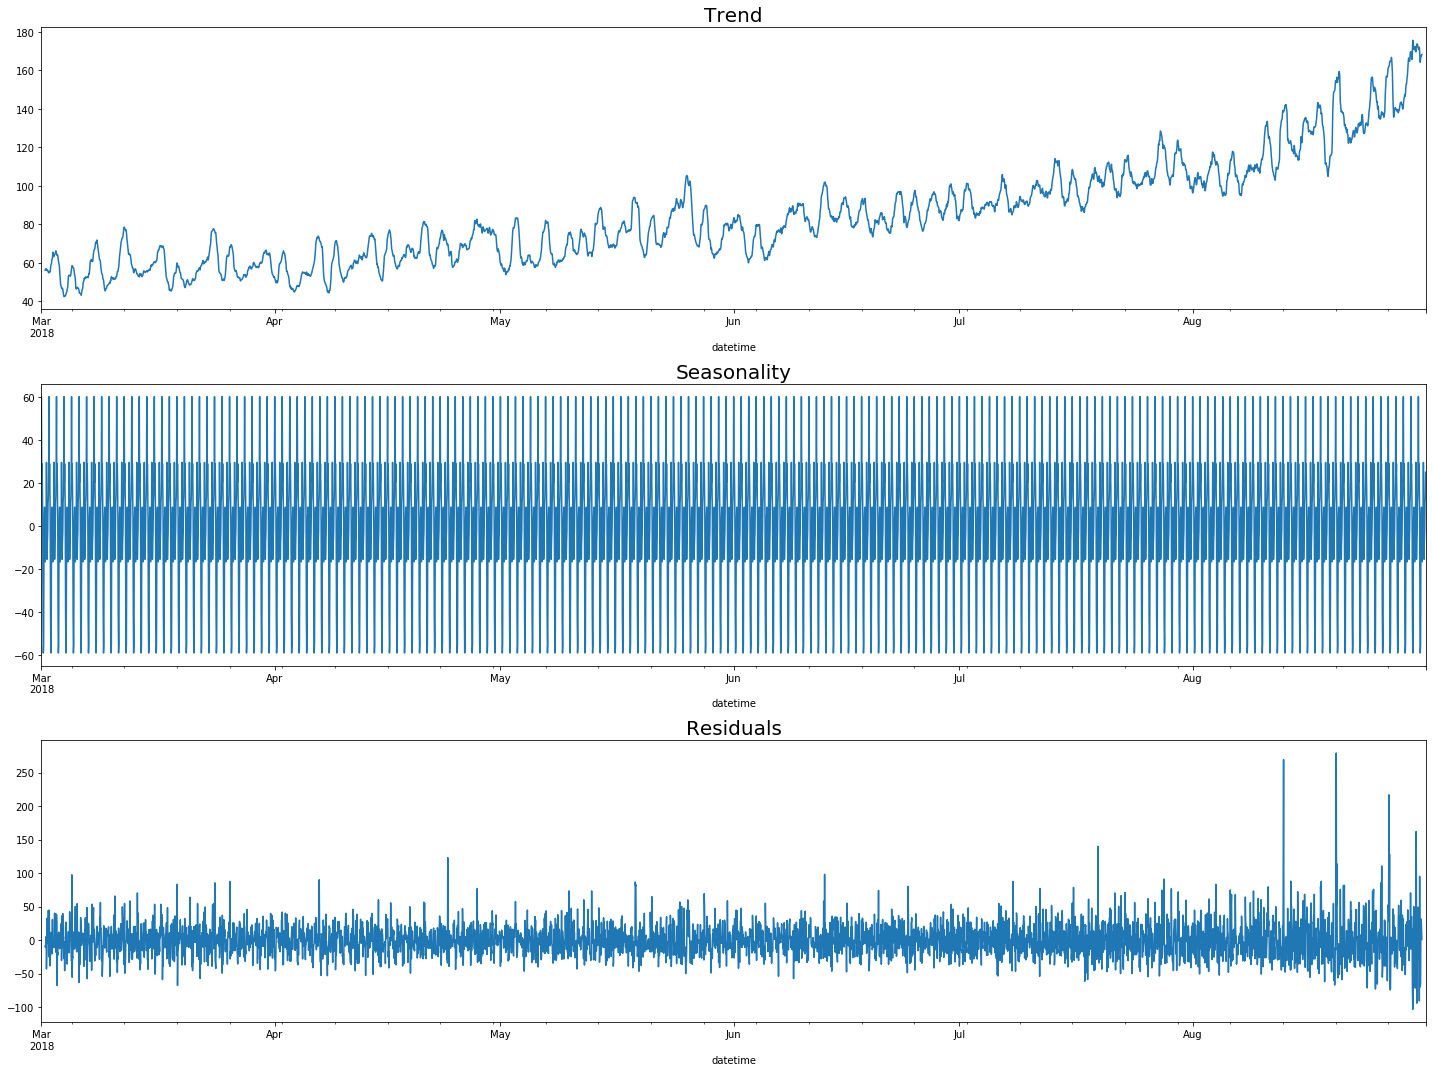

In [21]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(20, 15))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend', fontsize=20)
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality', fontsize=20)
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals', fontsize=20)
plt.tight_layout();

- The overall trend shows that the number of orders is growing in this company over the time.

- We don't see any clear seasonality in terms of months of the year in this dataset but we should remember that the data is collected for only 6 months.

- The residuals graph shows a stationary stochastic process, the level of residuals doesn't change over time, so it shouldn't influence the predictions. It is essentially just noise in the data. The residuals level is mostly around 0, which means that the data was well decomposed.

Let's look at the hourly data and see whether there are any patterns.

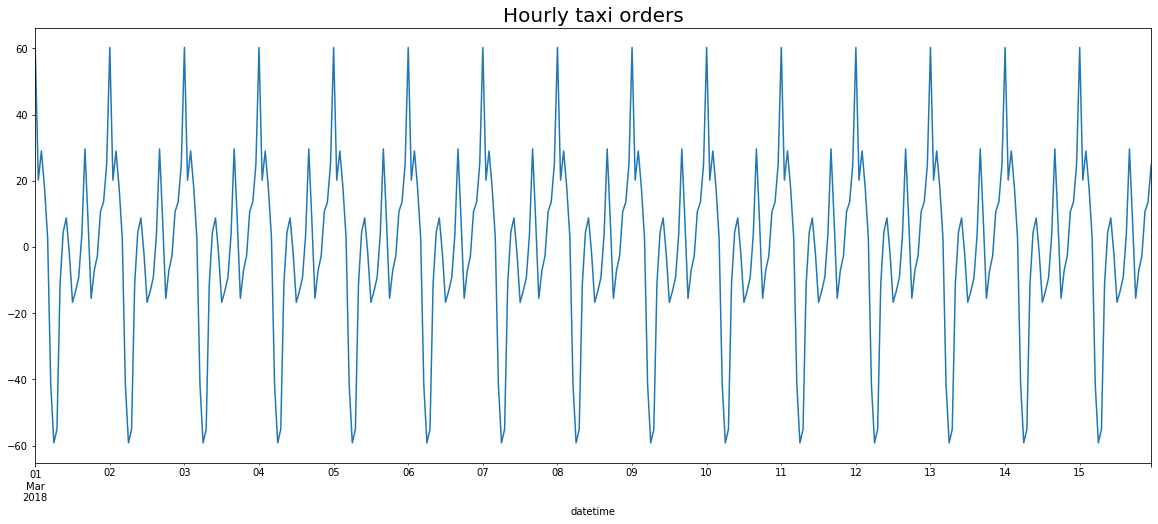

In [24]:
plt.figure(figsize=(20, 8))
decomposed.seasonal['2018-03-01':'2018-03-15'].plot()
plt.title('Hourly taxi orders', fontsize=20);

We can see a clear pattern of the number of orders during each day. The lowest peak is around 5-6AM and the highest one is around 11-12PM. We will create a new feature in the next section that will help a model better learn this pattern.

## Feature engineering

### New features
Let's create some new features from our data, it should help the model make better predictions. 

In [26]:
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hourofday'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data['rolling_std'] = data['num_orders'].shift().rolling(rolling_mean_size).std()
    
make_features(df, 10, 5)

In [27]:
df.head()

,num_orders,month,day,dayofweek,hourofday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,rolling_mean,rolling_std
datetime,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,NaN,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,-39.0,3,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,-14.0,3,1,3,2,-39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,-5.0,3,1,3,3,-14.0,-39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,-23.0,3,1,3,4,-5.0,-14.0,-39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Splitting the data

In [28]:
df = df.dropna(how='any', axis=0)

X = df.drop('num_orders', axis=1)
y = df['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)

In [29]:
print('Train set from', X_train.index.min(), 'until', X_train.index.max())
print('Test set from', X_test.index.min(), 'until', X_test.index.max())

Train set from 2018-03-01 11:00:00 until 2018-08-13 14:00:00
Test set from 2018-08-13 15:00:00 until 2018-08-31 23:00:00


## Standard scaling
Let's scale the features before modeling to be able to compare their coefficients in the later sections.

In [30]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model selection

We will be using the RMSE metric for best model selection. Let's create this function and the respective scorer to use it in the GridSearch and cross-validation further.

In [31]:
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)

    distance = predict - actual

    square_distance = distance ** 2

    mean_square_distance = square_distance.mean()

    score = np.sqrt(mean_square_distance)

    return score

rmse_scorer = make_scorer(rmse, greater_is_better = False)

Let's instantiate a TimeSeriesSplit that we will use for different models to split train set into train and validation parts.

In [32]:
tscv = TimeSeriesSplit()

### Baseline

In [33]:
model = DummyRegressor(strategy='median')
baseline = np.mean(abs(cross_val_score(model,  X_train, y_train, cv=tscv, scoring = rmse_scorer)))
baseline

37.03855837988927

<div class="alert alert-block alert-success">
<b>Success:</b> Great that you've used apropriate to data splitter.
</div>

### Random Forest
#### Base model

In [34]:
RF = RandomForestRegressor(random_state=12345)
RF_base = np.mean(abs(cross_val_score(RF,  X_train, y_train, cv=tscv, scoring = rmse_scorer)))
RF_base

27.695984384784133

#### Hyperparameters tuning

In [35]:
params = {"n_estimators" : [500, 700],
             "max_depth" : [6, 7, 8, 9, 10]}

gsSVR = GridSearchCV(estimator=RF, cv=tscv, param_grid=params, n_jobs=-1, verbose=0, scoring=rmse_scorer)
gsSVR.fit(X_train, y_train)
SVR_best = gsSVR.best_estimator_
print(abs(gsSVR.best_score_))

27.685830844756293


In [36]:
best_param = pd.DataFrame(gsSVR.best_params_, index=[0])
RF_score_tuned = abs(gsSVR.best_score_)
best_param['score'] = RF_score_tuned

best_param

,max_depth,n_estimators,score
0,10,500,27.685831


### XGBoost

In [37]:
XGB = XGBRegressor(n_jobs=-1, random_state=12345)
XGB_base = np.mean(abs(cross_val_score(XGB,  X_train, y_train, cv=tscv, scoring = rmse_scorer)))
XGB_base

27.84081524120368

#### Hyperparameters tuning

In [38]:
params = {"n_estimators" : [500, 700],
             "max_depth" : [6, 7, 8, 9, 10]}

gsSVR = GridSearchCV(estimator=XGB, cv=tscv, param_grid=params, n_jobs=-1, verbose=0, scoring=rmse_scorer)
gsSVR.fit(X_train, y_train)
SVR_best = gsSVR.best_estimator_
print(abs(gsSVR.best_score_))

27.87332446489183


In [39]:
best_param = pd.DataFrame(gsSVR.best_params_, index=[0])
XGB_score_tuned = abs(gsSVR.best_score_)
best_param['score'] = XGB_score_tuned

best_param

,max_depth,n_estimators,score
0,6,500,27.873324


### LightGBM

In [40]:
LGB = LGBMRegressor(random_state=12345)
LGB_base = np.mean(abs(cross_val_score(LGB,  X_train, y_train, cv=tscv, scoring = rmse_scorer)))
LGB_base

26.927415627655176

#### Hyperparameters tuning

In [41]:
params = {"n_estimators" : [500, 700],
             "max_depth" : [6, 7, 8, 9, 10]}

gsSVR = GridSearchCV(estimator=LGB, cv=tscv, param_grid=params, n_jobs=-1, verbose=0, scoring=rmse_scorer)
gsSVR.fit(X_train, y_train)
SVR_best = gsSVR.best_estimator_
print(abs(gsSVR.best_score_))

26.922160988250802


In [42]:
best_param = pd.DataFrame(gsSVR.best_params_, index=[0])
LGB_score_tuned = abs(gsSVR.best_score_)
best_param['score'] = LGB_score_tuned

best_param

,max_depth,n_estimators,score
0,7,500,26.922161


### CatBoost

In [43]:
CB = CatBoostRegressor(verbose=0, loss_function="RMSE", random_state=12345)
CB_base = np.mean(abs(cross_val_score(CB,  X_train, y_train, cv=tscv, scoring = rmse_scorer)))
CB_base

25.98269431164594

#### Hyperparameters tuning

In [44]:
params = {"iterations" : [500, 700],
             "depth" : [6, 7, 8, 9, 10]}

gsSVR = GridSearchCV(estimator=CB, cv=tscv, param_grid=params, n_jobs=-1, verbose=0, scoring=rmse_scorer)
gsSVR.fit(X_train, y_train)
SVR_best = gsSVR.best_estimator_
print(abs(gsSVR.best_score_))

26.061997143628922


In [45]:
best_param = pd.DataFrame(gsSVR.best_params_, index=[0])
CB_score_tuned = abs(gsSVR.best_score_)
best_param['score'] = CB_score_tuned

best_param

,depth,iterations,score
0,6,700,26.061997


### Results

In [46]:
models = pd.DataFrame({
    'Model': ['baseline', 'RF_base', 'XGB_base', 'LGB_base', 'CB_base', 
             'RF_tuned', 'XGB_tuned', 'LGB_tuned', 'CB_tuned'],
    'Score': [baseline, RF_base, XGB_base, LGB_base, CB_base,
             RF_score_tuned, XGB_score_tuned, LGB_score_tuned, CB_score_tuned]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

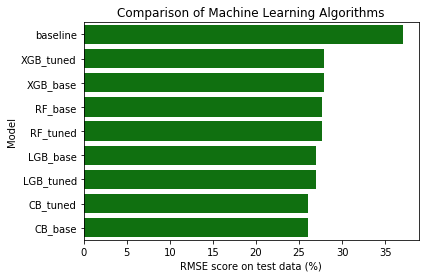

In [47]:
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'g')
plt.title('Comparison of Machine Learning Algorithms')
plt.xlabel('RMSE score on test data (%)')
plt.ylabel('Model');

As we can see, the **base CatBoost model** showed the best train RMSE score (25.98). Based on that, we will be recommending this model to be the final model for this project. In terms of future development, we see that hyperparameter tuning didn't change the CB model's score much. Probably other parameters should also be tuned to reach any significant improvement.

### Feature importances

Let's see what features were the most important for prediction.

In [48]:
CB = CatBoostRegressor(verbose=0, loss_function="RMSE", random_state=12345)
CB.fit(X_train, y_train)

coeff_df = pd.DataFrame()
coeff_df['Feature'] = df.drop(['num_orders'], axis=1).columns.values
coeff_df["Correlation"] = pd.Series(CB.feature_importances_)

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,hourofday,30.721629
14,rolling_mean,17.810282
4,lag_1,9.291658
9,lag_6,6.341063
0,month,4.093035
5,lag_2,3.837391
11,lag_8,3.715292
13,lag_10,3.332679
10,lag_7,3.315139
8,lag_5,3.313232


`hourofday` and `rolling_mean` turned out to be much more important in this model than any other feature.

## Test the model

In [49]:
y_pred_test = CB.predict(X_test)
CB_test_score = rmse(y_test, y_pred_test)
CB_test_score

40.570918937457144

## Sanity check

In [51]:
model = DummyRegressor(strategy='median')
model.fit(X_train, y_train)
y_base_test = model.predict(X_test)
base_test_score = rmse(y_test, y_base_test)
base_test_score

58.92214010119039

In [52]:
round((58.92-40.57)/58.92 * 100, 2)

31.14

The test score of the dummy regression model, that we use as a baseline to analyze the model quality, is 31.14% higher than our final chosen model. It means that the modeling was useful.

# Conclusion

The **goal** of this project was to develop a model to determine the amount of taxi orders for the next hour based on the historical data. The RMSE metric on the test set had to be no more than **48**.

I have completed the following steps in this project:

**1.Descriptive statistics**

**2.Data preprocessing**
   
I made sure the dates and times were in chronological order, resample data by 1 hour because we needed to predict orders for the next hour and took the sum as an aggregation function since we needed to identify the total number of orders for a particular hour. I plotted the data and noticed that this set is quite stationary. Finally, I've checked the data for duplicates.
   
**3.EDA**

I built a seasonal decomposition of the dataset to see if there are any trends and seasonality in the data. 
I've noticed the overall trend that the number of orders is growing in this company over the time. I didn't see any clear seasonality in terms of months of the year in this dataset but the data was collected for only 6 months. The level of residuals doesn't change over time, so it shouldn't influence the predictions. The residuals level is mostly around 0, which means that the data was well decomposed. 

Finally, I took a look at the hourly data and noticed a pattern of the number of orders during each day. Based on that I've decided to create a new feature that will help a model better learn this pattern.
    
**4.Splitting the data**

Data was split into train and test sets with the ration 1:5.

**5. Standard scaling**

It was performed to be able to compare feature importances.

**6.Model selection**

I compared Linear Regression, Random Forest, XGBoost, LightGBM and CatBoost models. I also tuned a few hyperparameters for these algorithms and chosen the tuned `CatBoost model` based on RMSE score.

**7.Feature importances**

Based on the features importances attribute, I found that the `hourofday` and `rolling_mean` turned out to be much more important in this model than any other feature.

**8.Sanity check**

The test score of the Dummy regression model, that we use as a baseline to analyze the model quality, is 30.51% higher than our final chosen model. It means that the modeling was useful.

**Results**

**The base CatBoost model** has shown the best results (**test RMSE of 40.57**) in terms of quality. The target metric of 48 or lower has been reached. It showed some degree of overfitting that can be dealt with in the future. Besides, the model with tuned hyperparameters gave slightly worse results than the base model with default parameters, probably other parameters should be adjusted. This can be done in the future.